# Data Understanding

# Importing the Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/AhmedB255/BINF-820---Bachelor-Thesis/main/Test_Withoutnetscan.csv')

data.head()

,PID,Unnamed: 1,Unnamed: 2,PPID,Unnamed: 4,Unnamed: 5,Threads,Unnamed: 7,Unnamed: 8,Handles,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Mean,Variance,Standard Deviation,Mean,Variance,Standard Deviation,Mean,Variance,Standard Deviation,Mean,...,Variance,Standard Deviation,NaN,NaN,label,NaN,NaN,NaN,NaN,NaN
1,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.63414634,164.3878049,12.82138077,285.8780488,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.51219512,175.4060976,13.24409671,288,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.73170732,171.4012195,13.09202885,289.4390244,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.68292683,175.7719512,13.25790146,289.3902439,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


We will first remove the last few columns as they are not needed.

In [2]:
data = data.iloc[:, :-5]

data.head()

,PID,Unnamed: 1,Unnamed: 2,PPID,Unnamed: 4,Unnamed: 5,Threads,Unnamed: 7,Unnamed: 8,Handles,...,Unnamed: 11,Session,Unnamed: 13,Unnamed: 14,Status,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Mean,Variance,Standard Deviation,Mean,Variance,Standard Deviation,Mean,Variance,Standard Deviation,Mean,...,Standard Deviation,Mean,Variance,Standard Deviation,Mean,Variance,Standard Deviation,NaN,NaN,label
1,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.63414634,164.3878049,12.82138077,285.8780488,...,277.9671019,0.195121951,0.26097561,0.51085772,1,0,0,NaN,NaN,0
2,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.51219512,175.4060976,13.24409671,288,...,277.5891749,0.195121951,0.26097561,0.51085772,1,0,0,NaN,NaN,0
3,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.73170732,171.4012195,13.09202885,289.4390244,...,277.1625019,0.195121951,0.26097561,0.51085772,1,0,0,NaN,NaN,0
4,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.68292683,175.7719512,13.25790146,289.3902439,...,276.5744817,0.195121951,0.26097561,0.51085772,1,0,0,NaN,NaN,0


Then, we will change the name of the columns and focus on the data starting from the second row.

In [3]:
columns = ['PID_mean', 'PID_var', 'PID_std',
           'PPID_mean', 'PPID_var', 'PPID_std',
           'Threads_mean', 'Threads_var', 'Threads_std',
           'Handles_mean', 'Handles_var', 'Handles_std',
           'Session_mean', 'Session_var', 'Session_std',
           'Status_mean', 'Status_var', 'Status_std',
          'Unknown1', 'Unknown2', 'Label']

data.columns = columns

data = data.drop(['Unknown1', 'Unknown2'], axis=1)

data = data.iloc[1:]

data.head()

,PID_mean,PID_var,PID_std,PPID_mean,PPID_var,PPID_std,Threads_mean,Threads_var,Threads_std,Handles_mean,Handles_var,Handles_std,Session_mean,Session_var,Session_std,Status_mean,Status_var,Status_std,Label
1,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.63414634,164.3878049,12.82138077,285.8780488,77265.70976,277.9671019,0.195121951,0.26097561,0.51085772,1,0,0,0
2,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.51219512,175.4060976,13.24409671,288,77055.75,277.5891749,0.195121951,0.26097561,0.51085772,1,0,0,0
3,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.73170732,171.4012195,13.09202885,289.4390244,76819.05244,277.1625019,0.195121951,0.26097561,0.51085772,1,0,0,0
4,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,12.68292683,175.7719512,13.25790146,289.3902439,76493.4439,276.5744817,0.195121951,0.26097561,0.51085772,1,0,0,0
5,1209.365854,696153.2878,834.3580094,719.1219512,525958.8098,725.2301771,14.31707317,218.1719512,14.77064492,296.2439024,84436.23902,290.5791442,0.195121951,0.26097561,0.51085772,1,0,0,0


In [4]:
data.shape

(767, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 1 to 767
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PID_mean      764 non-null    object
 1   PID_var       764 non-null    object
 2   PID_std       764 non-null    object
 3   PPID_mean     764 non-null    object
 4   PPID_var      764 non-null    object
 5   PPID_std      764 non-null    object
 6   Threads_mean  764 non-null    object
 7   Threads_var   764 non-null    object
 8   Threads_std   764 non-null    object
 9   Handles_mean  764 non-null    object
 10  Handles_var   764 non-null    object
 11  Handles_std   764 non-null    object
 12  Session_mean  764 non-null    object
 13  Session_var   764 non-null    object
 14  Session_std   764 non-null    object
 15  Status_mean   764 non-null    object
 16  Status_var    764 non-null    object
 17  Status_std    764 non-null    object
 18  Label         767 non-null    object
dtypes: objec

In [6]:
data.describe()

,PID_mean,PID_var,PID_std,PPID_mean,PPID_var,PPID_std,Threads_mean,Threads_var,Threads_std,Handles_mean,Handles_var,Handles_std,Session_mean,Session_var,Session_std,Status_mean,Status_var,Status_std,Label
count,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,764,767
unique,443,450,450,373,376,376,410,760,760,734,763,763,72,75,75,22,22,22,2
top,1312.622222,542130.9175,736.295401,613.8461538,238398.1862,488.2603673,12.5,193.3333333,13.69921198,276.9767442,75474.80399,274.7267806,0.23255814,0.277962348,0.527221346,1,0,0,1
freq,10,10,10,13,13,13,9,2,2,3,2,2,65,65,65,714,714,714,436


# Data Preparation

The Data Preparation phase is the most important phase in this project, and it is the phase in which we use feature selection.

## Data Cleaning

In this phase, we will only check for missing values. Inconsistencies in this case are considered to be anomalies and we will check for them in the modelling phase.

So, let's check if there are any null values in the dataset.

In [7]:
data.isnull().any()

PID_mean         True
PID_var          True
PID_std          True
PPID_mean        True
PPID_var         True
PPID_std         True
Threads_mean     True
Threads_var      True
Threads_std      True
Handles_mean     True
Handles_var      True
Handles_std      True
Session_mean     True
Session_var      True
Session_std      True
Status_mean      True
Status_var       True
Status_std       True
Label           False
dtype: bool

There are null values in this dataset. Let's check how many.

In [8]:
data.isnull().sum()

PID_mean        3
PID_var         3
PID_std         3
PPID_mean       3
PPID_var        3
PPID_std        3
Threads_mean    3
Threads_var     3
Threads_std     3
Handles_mean    3
Handles_var     3
Handles_std     3
Session_mean    3
Session_var     3
Session_std     3
Status_mean     3
Status_var      3
Status_std      3
Label           0
dtype: int64

There are three empty values for every column. Let's check if there are three empty rows.

In [9]:
missing_values = data.isnull().sum(axis=1) > 0
data[missing_values]

,PID_mean,PID_var,PID_std,PPID_mean,PPID_var,PPID_std,Threads_mean,Threads_var,Threads_std,Handles_mean,Handles_var,Handles_std,Session_mean,Session_var,Session_std,Status_mean,Status_var,Status_std,Label
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Due to the fact that the rows are completely empty, they are useless to us and it wouldn't make sense to impute those rows. <br> Therefore, they will be dropped.

In [10]:
data = data.drop([26, 345, 357])

data.isnull().any()

PID_mean        False
PID_var         False
PID_std         False
PPID_mean       False
PPID_var        False
PPID_std        False
Threads_mean    False
Threads_var     False
Threads_std     False
Handles_mean    False
Handles_var     False
Handles_std     False
Session_mean    False
Session_var     False
Session_std     False
Status_mean     False
Status_var      False
Status_std      False
Label           False
dtype: bool

Let's really make sure that there are no null values.

In [11]:
for col in data.columns:
    print(f"Number of empty strings in column {col} : {data[col].isin(['']).sum(axis=0)}")
    print(f"Number of only space strings in column {col} : {data[col].isin([' ']).sum(axis=0)}")

Number of empty strings in column PID_mean : 0
Number of only space strings in column PID_mean : 0
Number of empty strings in column PID_var : 0
Number of only space strings in column PID_var : 0
Number of empty strings in column PID_std : 0
Number of only space strings in column PID_std : 0
Number of empty strings in column PPID_mean : 0
Number of only space strings in column PPID_mean : 0
Number of empty strings in column PPID_var : 0
Number of only space strings in column PPID_var : 0
Number of empty strings in column PPID_std : 0
Number of only space strings in column PPID_std : 0
Number of empty strings in column Threads_mean : 0
Number of only space strings in column Threads_mean : 0
Number of empty strings in column Threads_var : 0
Number of only space strings in column Threads_var : 0
Number of empty strings in column Threads_std : 0
Number of only space strings in column Threads_std : 0
Number of empty strings in column Handles_mean : 0
Number of only space strings in column H

Good. There are no null values. Let's proceed to the next step.

## Data Integration

Data Integration is used when we have to combine data from multiple sources. Since we only have one source, this step will be skipped.

## Data Transformation

Data Transformation is one of the most significant steps which will affect the accuracy rate when detecting anomalies.

In [12]:
data = data.apply(pd.to_numeric, errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 1 to 767
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID_mean      764 non-null    float64
 1   PID_var       764 non-null    float64
 2   PID_std       764 non-null    float64
 3   PPID_mean     764 non-null    float64
 4   PPID_var      764 non-null    float64
 5   PPID_std      764 non-null    float64
 6   Threads_mean  764 non-null    float64
 7   Threads_var   764 non-null    float64
 8   Threads_std   764 non-null    float64
 9   Handles_mean  764 non-null    float64
 10  Handles_var   764 non-null    float64
 11  Handles_std   764 non-null    float64
 12  Session_mean  764 non-null    float64
 13  Session_var   764 non-null    float64
 14  Session_std   764 non-null    float64
 15  Status_mean   764 non-null    float64
 16  Status_var    764 non-null    float64
 17  Status_std    764 non-null    float64
 18  Label         764 non-null    

array([[<AxesSubplot:title={'center':'PID_mean'}>,
        <AxesSubplot:title={'center':'PID_var'}>,
        <AxesSubplot:title={'center':'PID_std'}>,
        <AxesSubplot:title={'center':'PPID_mean'}>],
       [<AxesSubplot:title={'center':'PPID_var'}>,
        <AxesSubplot:title={'center':'PPID_std'}>,
        <AxesSubplot:title={'center':'Threads_mean'}>,
        <AxesSubplot:title={'center':'Threads_var'}>],
       [<AxesSubplot:title={'center':'Threads_std'}>,
        <AxesSubplot:title={'center':'Handles_mean'}>,
        <AxesSubplot:title={'center':'Handles_var'}>,
        <AxesSubplot:title={'center':'Handles_std'}>],
       [<AxesSubplot:title={'center':'Session_mean'}>,
        <AxesSubplot:title={'center':'Session_var'}>,
        <AxesSubplot:title={'center':'Session_std'}>,
        <AxesSubplot:title={'center':'Status_mean'}>],
       [<AxesSubplot:title={'center':'Status_var'}>,
        <AxesSubplot:title={'center':'Status_std'}>,
        <AxesSubplot:title={'center':'Labe

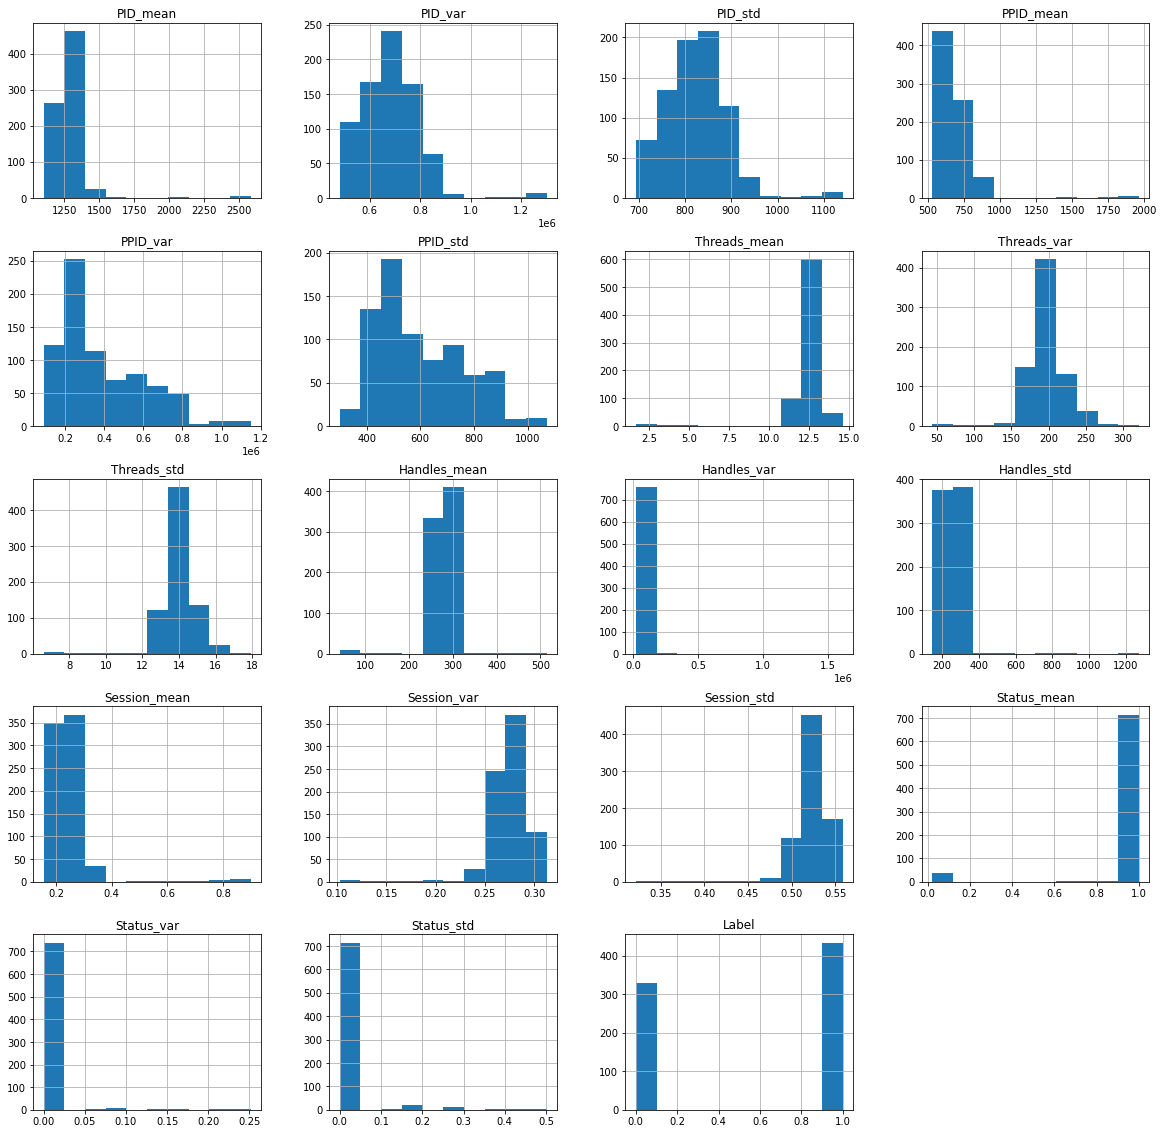

In [13]:
data.hist(figsize=(20, 20))

To achieve better accuracy, we will discretize the dataset. This means that we will put the data values into a certain number of bins. For this dataset, 6 bins were chosen.

array([[<AxesSubplot:title={'center':'PID_mean'}>,
        <AxesSubplot:title={'center':'PID_var'}>,
        <AxesSubplot:title={'center':'PID_std'}>,
        <AxesSubplot:title={'center':'PPID_mean'}>],
       [<AxesSubplot:title={'center':'PPID_var'}>,
        <AxesSubplot:title={'center':'PPID_std'}>,
        <AxesSubplot:title={'center':'Threads_mean'}>,
        <AxesSubplot:title={'center':'Threads_var'}>],
       [<AxesSubplot:title={'center':'Threads_std'}>,
        <AxesSubplot:title={'center':'Handles_mean'}>,
        <AxesSubplot:title={'center':'Handles_var'}>,
        <AxesSubplot:title={'center':'Handles_std'}>],
       [<AxesSubplot:title={'center':'Session_mean'}>,
        <AxesSubplot:title={'center':'Session_var'}>,
        <AxesSubplot:title={'center':'Session_std'}>,
        <AxesSubplot:title={'center':'Status_mean'}>],
       [<AxesSubplot:title={'center':'Status_var'}>,
        <AxesSubplot:title={'center':'Status_std'}>,
        <AxesSubplot:title={'center':'Labe

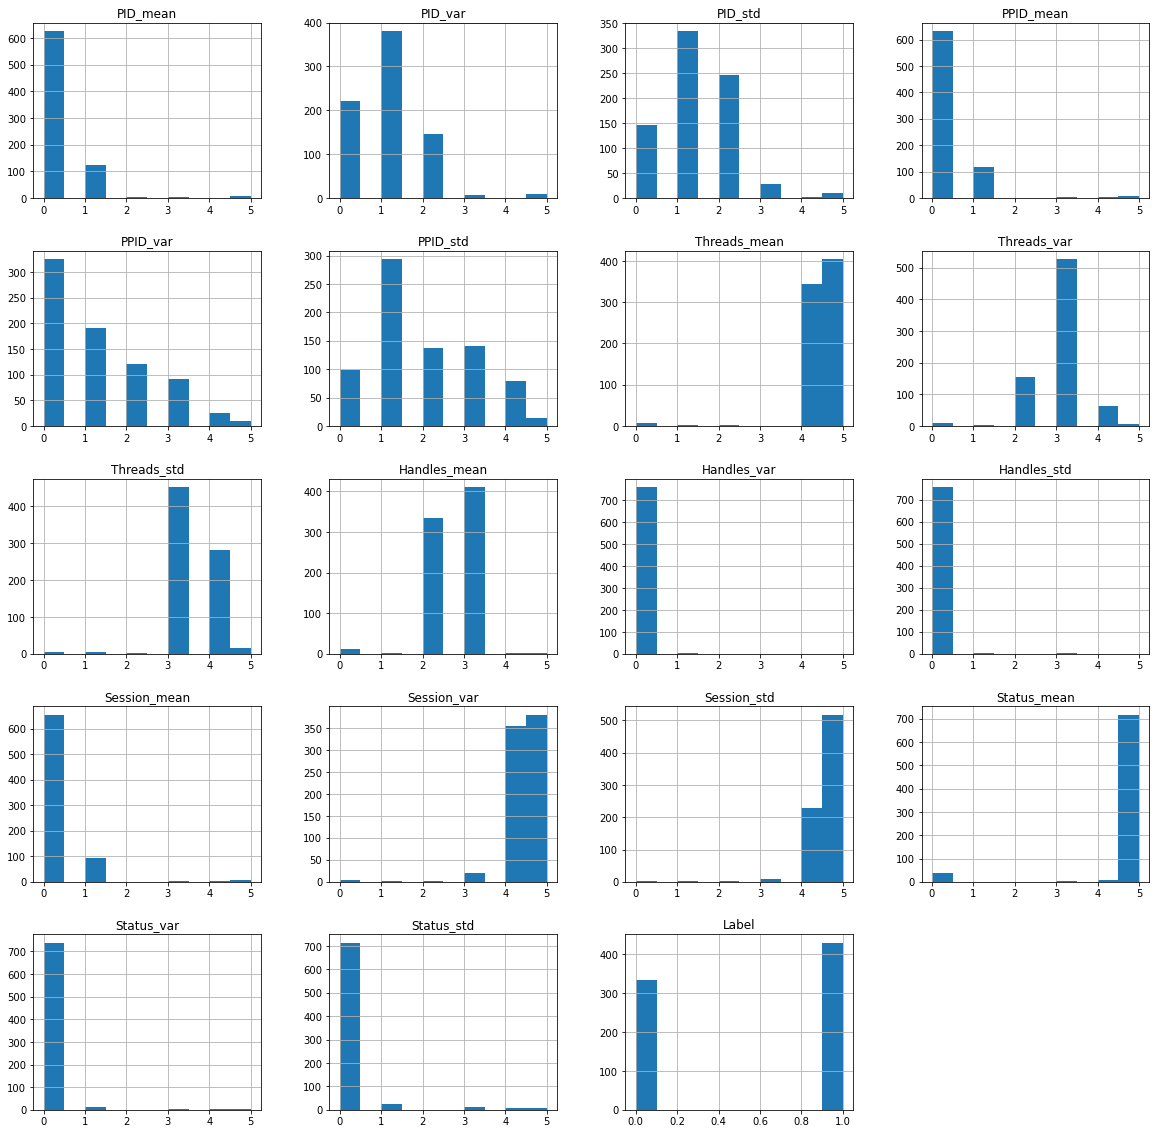

In [14]:
from sklearn.preprocessing import KBinsDiscretizer

data_values = data.iloc[:, :-1]

trans = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='uniform')
data_values = trans.fit_transform(data_values)

data_values = pd.DataFrame(data_values)

label_data = data.iloc[:, -1:]

new_data = data_values

columns = ['PID_mean', 'PID_var', 'PID_std',
           'PPID_mean', 'PPID_var', 'PPID_std',
           'Threads_mean', 'Threads_var', 'Threads_std',
           'Handles_mean', 'Handles_var', 'Handles_std',
           'Session_mean', 'Session_var', 'Session_std',
           'Status_mean', 'Status_var', 'Status_std']

new_data.columns = columns

new_data = new_data.join(label_data)

new_data = new_data.replace(np.nan, 0.0)

new_data.hist(figsize=(20, 20))

In [15]:
new_data.head()

,PID_mean,PID_var,PID_std,PPID_mean,PPID_var,PPID_std,Threads_mean,Threads_var,Threads_std,Handles_mean,Handles_var,Handles_std,Session_mean,Session_var,Session_std,Status_mean,Status_var,Status_std,Label
0,0.0,1.0,1.0,0.0,2.0,3.0,5.0,2.0,3.0,3.0,0.0,0.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,2.0,3.0,5.0,2.0,3.0,3.0,0.0,0.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,2.0,3.0,5.0,2.0,3.0,3.0,0.0,0.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,2.0,3.0,5.0,2.0,3.0,3.0,0.0,0.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,4.0,3.0,0.0,0.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0


## Modelling (Without Feature Selection)

For the next part, we will do three things:<br>
1. We will create a method that prints some of the model's performance metrics.<br>
2. We will use automatic hyperparameter tuning for the models.
3. We will create two models without conducting feature selection. For this task, we will use two classifiers; a decision tree classifier, and a naive bayes classifier.<br><br>

This part will help us determine if the performance of the model improves after utilizing feature selection.

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_scores(clf, X_train, X_test, y_train, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print('Training Results:')
        print('=================================================')
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.7f}%")
        print('=================================================')
        print(f"Classification Report: \n{clf_report}")
        print('=================================================')
        print(f"Confusion Matrix: \n{confusion_matrix(y_train, pred)}")
    else:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print('Test Results:')
        print('=================================================')
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.7f}%")
        print('=================================================')
        print(f"Classification Report: \n{clf_report}")
        print('=================================================')
        print(f"Confusion Matrix: \n{confusion_matrix(y_test, pred)}")

Great. First, we will split the dataset into a training and testing dataset.

In [17]:
from sklearn.model_selection import train_test_split

X = new_data.drop('Label', axis=1)
y = new_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Next, we will use the Decision Tree Classifier to fit the dataset while also employing automatic hyperparameter tuning.

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

clf = DecisionTreeClassifier(random_state=42)
skf = StratifiedKFold(n_splits=3)

scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
print("Tree Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf = GaussianNB()

scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
print("Bayes Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Tree Score: 0.69 (+/- 0.03)
Bayes Score: 0.14 (+/- 0.10)


In [19]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)),
}

bayes_params = {
    "var_smoothing": np.logspace(0, -15, 100)
}

dtc = DecisionTreeClassifier(random_state=42)

# 3-fold cross-validation
tree_cv = GridSearchCV(dtc, tree_params, scoring='recall', n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
tree_best_params = tree_cv.best_params_

dtc = DecisionTreeClassifier(**tree_best_params)
dtc.fit(X_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 6668 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   11.9s finished


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=8,
                       splitter='random')

Next, we will use the Naive Bayes Classifier to fit the dataset while also employing automatic hyperparameter tuning.

In [20]:
#from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()

# 3-fold cross-validation
bayes_cv = GridSearchCV(nbc, bayes_params, scoring='recall', n_jobs=-1, verbose=1, cv=3)
bayes_cv.fit(X_train, y_train)
bayes_best_params = bayes_cv.best_params_

nbc = GaussianNB(**bayes_best_params)
nbc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.1s


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished


GaussianNB(var_smoothing=0.01519911082952933)

Now, we will use our method to print the model's performance metrics.

In [21]:
print("Decision Tree Scores:")
print()
print_scores(dtc, X_train, X_test, y_train, y_test, train=True)
print()
print_scores(dtc, X_train, X_test, y_train, y_test, train=False)
print()
print("==========================================")
print()
print("Naive Bayes Scores:")
print()
print_scores(nbc, X_train, X_test, y_train, y_test, train=True)
print()
print_scores(nbc, X_train, X_test, y_train, y_test, train=False)

Decision Tree Scores:

Training Results:
Accuracy Score: 63.4831461%
Classification Report: 
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.672897    0.625293  0.634831    0.649095      0.645975
recall       0.310345    0.884106  0.634831    0.597225      0.634831
f1-score     0.424779    0.732510  0.634831    0.578645      0.598814
support    232.000000  302.000000  0.634831  534.000000    534.000000
Confusion Matrix: 
[[ 72 160]
 [ 35 267]]

Test Results:
Accuracy Score: 62.1739130%
Classification Report: 
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.666667    0.610811  0.621739    0.638739      0.635582
recall       0.294118    0.882812  0.621739    0.588465      0.621739
f1-score     0.408163    0.722045  0.621739    0.565104      0.582845
support    102.000000  128.000000  0.621739  230.000000    230.000000
Confusion Matrix: 
[[ 30  72]
 [ 15 113]]


Naive Bayes Scores:

Training Results:
Accuracy Score:

Our efforts have yielded a significantly high accuracy rate along with some nice performance metrics. <br>
Let's plot the the decision tree to see how it looks like.

In [22]:
!pip install graphviz

## Data Reduction

In this phase, we will use dimensionality reduction, specifically feature selection, to decrease the number of features to determine if it improves cloud anomaly detection accuracy. <br>
Let's use the f_classif filter method.

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=14)

selected_data = selector.fit_transform(X, y)

selected_data.shape

(764, 14)

After running the above code, we will get a dataset without feature names.

In [24]:
pd.DataFrame(selected_data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0
1,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0
2,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0
3,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0
4,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0


To get the selected feature names, we run the following code.

In [25]:
mask = selector.get_support()
selected_features = []

for bool, feature in zip(mask, X.columns):
    if bool:
        selected_features.append(feature)

newer_data = pd.DataFrame(selected_data, columns=selected_features)

newer_data.head()

,PID_mean,PID_var,PID_std,PPID_mean,PPID_var,PPID_std,Threads_mean,Handles_mean,Session_mean,Session_var,Session_std,Status_mean,Status_var,Status_std
0,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0
1,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0
2,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0
3,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0
4,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0


We now have a dataset consisting of 14 features. Let's add the 'Label' columns to commence the classification process.

In [26]:
newer_data['Label'] = new_data['Label']

newer_data.head()

,PID_mean,PID_var,PID_std,PPID_mean,PPID_var,PPID_std,Threads_mean,Handles_mean,Session_mean,Session_var,Session_std,Status_mean,Status_var,Status_std,Label
0,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,2.0,3.0,5.0,3.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0


# Modelling (With Feature Selection)

In [27]:
X = newer_data.drop('Label', axis=1)
y = newer_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
skf = StratifiedKFold(n_splits=3)

scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
print("Tree Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf = GaussianNB()

scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
print("Bayes Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Tree Score: 0.65 (+/- 0.03)
Bayes Score: 0.26 (+/- 0.03)


In [28]:
dtc2 = DecisionTreeClassifier(random_state=42)

# 3-fold cross-validation
tree_cv = GridSearchCV(dtc2, tree_params, scoring='recall', n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
tree_best_params = tree_cv.best_params_

dtc2 = DecisionTreeClassifier(**tree_best_params)
dtc2.fit(X_train, y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 8180 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 12985 out of 12996 | elapsed:   11.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   11.1s finished


DecisionTreeClassifier(max_depth=1, splitter='random')

In [29]:
nbc2 = GaussianNB()

# 3-fold cross-validation
bayes_cv = GridSearchCV(nbc2, bayes_params, scoring='recall', n_jobs=-1, verbose=1, cv=3)
bayes_cv.fit(X_train, y_train)
bayes_best_params = bayes_cv.best_params_

nbc2 = GaussianNB(**bayes_best_params)
nbc2.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished


GaussianNB(var_smoothing=0.0037649358067924675)

In [30]:
print("Decision Tree Scores:")
print()
print_scores(dtc2, X_train, X_test, y_train, y_test, train=True)
print()
print_scores(dtc2, X_train, X_test, y_train, y_test, train=False)
print()
print("==========================================")
print()
print("Naive Bayes Scores:")
print()
print_scores(nbc2, X_train, X_test, y_train, y_test, train=True)
print()
print_scores(nbc2, X_train, X_test, y_train, y_test, train=False)

Decision Tree Scores:

Training Results:
Accuracy Score: 59.9250936%
Classification Report: 
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.530822    0.681818  0.599251    0.606320      0.616217
recall       0.668103    0.546358  0.599251    0.607231      0.599251
f1-score     0.591603    0.606618  0.599251    0.599110      0.600094
support    232.000000  302.000000  0.599251  534.000000    534.000000
Confusion Matrix: 
[[155  77]
 [137 165]]

Test Results:
Accuracy Score: 63.0434783%
Classification Report: 
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.575221    0.683761  0.630435    0.629491      0.635626
recall       0.637255    0.625000  0.630435    0.631127      0.630435
f1-score     0.604651    0.653061  0.630435    0.628856      0.631592
support    102.000000  128.000000  0.630435  230.000000    230.000000
Confusion Matrix: 
[[65 37]
 [48 80]]


Naive Bayes Scores:

Training Results:
Accuracy Score: 48.